In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [2]:
import os

In [3]:
input_dir = 'images/'
target_dir = 'annotations/trimaps'

In [8]:
input_img_paths = sorted(
    [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith('.jpg')]
)

target_img_paths = sorted(
    [os.path.join(target_dir, fname) for fname in os.listdir(target_dir) if fname.endswith('.png') and not fname.startswith('.')]
)

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

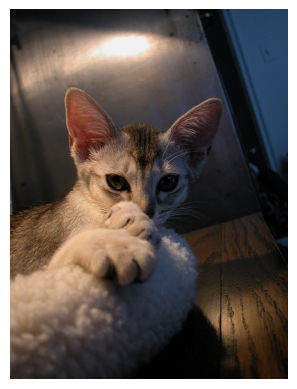

In [19]:
plt.axis('off')
plt.imshow(load_img(input_img_paths[1]));

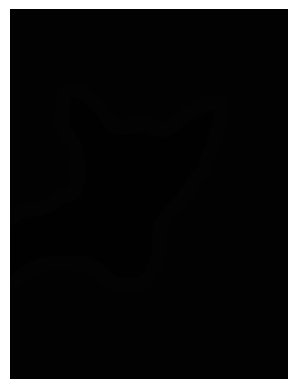

In [22]:
plt.axis('off')
plt.imshow(load_img(target_img_paths[1]));

In [23]:
def display_target(target_arr):
  normalized_arr = (target_arr.astype('uint8') - 1) * 127
  plt.axis('off')
  plt.imshow(normalized_arr[:, :, 0])

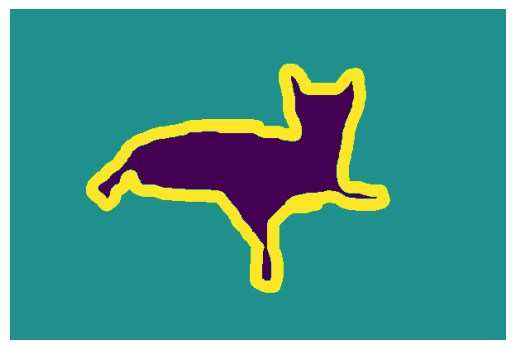

In [24]:
img = img_to_array(load_img(target_img_paths[0], color_mode='grayscale'))
display_target(img)

In [26]:
import numpy as np
import random

In [27]:
img_size = (200, 200)
num_imgs = len(input_img_paths)

In [28]:
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

In [29]:
def path_to_input_image(path):
  return img_to_array(load_img(path, target_size=img_size))

In [30]:
def path_to_target(path):
  img = img_to_array(
      load_img(path, target_size=img_size, color_mode='grayscale')
  )
  img = img.astype('uint8') - 1
  return img

In [31]:
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype='float32')
targets = np.zeros((num_imgs,) + img_size + (1,), dtype='float32')

In [32]:
for i in range(num_imgs):
  input_imgs[i] = path_to_input_image(input_img_paths[i])
  targets[i] = path_to_target(target_img_paths[i])

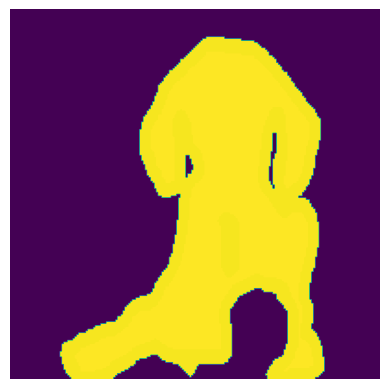

In [35]:
display_target(targets[8])

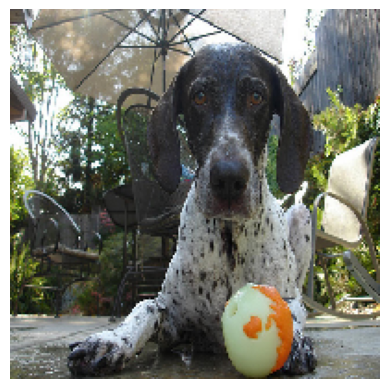

In [40]:
plt.axis('off')
plt.imshow(input_imgs[8].astype('uint8'));

In [42]:
num_val_samples = 1_000
train_imgs = input_imgs[num_val_samples:]
train_targets = targets[num_val_samples:]

val_imgs = input_imgs[:num_val_samples]
val_targets = targets[:num_val_samples]

In [43]:
print(f'{train_imgs.shape} -- {train_targets.shape}')
print(f'{val_imgs.shape} -- {val_targets.shape}')

(6390, 200, 200, 3) -- (6390, 200, 200, 1)
(1000, 200, 200, 3) -- (1000, 200, 200, 1)
